<a href="https://colab.research.google.com/github/Ezekiah3854/RNN_project/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members

1.   Granton Waribe - IN13/00036/21
2.   Ezekiah Nyagwaya - IN13/00037/21
3.   Wachiye Likami Collins - IN13/00110/19


[kaggle RNN notebook](https://www.kaggle.com/code/moonglow22/rnn-and-lstm-tutorial-for-beginners?scriptVersionId=140804795&cellId=25) \
[dataset](https://drive.google.com/uc?id=1eQr4YGZ6Y3Oc9wsnP-gpdgtUhsOqHWyj&export=download)\
rewriting the code in the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# import and load dataset
df = pd.read_csv('https://drive.google.com/uc?id=1eQr4YGZ6Y3Oc9wsnP-gpdgtUhsOqHWyj&export=download', skipfooter=5, engine='python') # the last 5 data rows were distorted
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


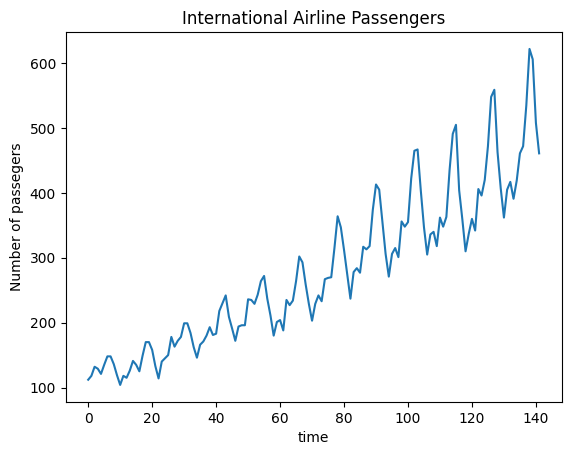

In [3]:
# data visualization
dataset = df.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of passegers")
plt.title("International Airline Passengers")
plt.show()

In [4]:
#Data preprocessing
# 1. Reshaping
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [5]:
# Scaling to prevent scale biasness
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# Spliting the data into training and testing sets
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(f'Train Size: {len(train)}')
print(f'Test Size: {len(test)}')

Train Size: 71
Test Size: 71


In [7]:
# Prepare the training data
time_stamp = 10
dataX = []
dataY = []
for i in range(len(test)-time_stamp-1):
    a = train[i:(i+time_stamp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stamp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [8]:
# Prepare the testing data
dataX = []
dataY = []
for i in range(len(test) - time_stamp - 1):
  a = test[i: (i + time_stamp), 0]
  dataX.append(a)
  dataY.append(test[i + time_stamp, 0])
testX = np.array(dataX)
testY = np.array(dataY)

In [9]:
# reshape train and test data - ensures data is compatible with choosen model
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create LSTM Model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stamp))) # 10 lstm neuron block
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0144
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 16/50


In [11]:
# prediction and visualizing LSTM model
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2d RMSE' % (trainScore)) # Root Mean Squrar Error
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Train Score: 16 RMSE
Test Score: 39.66 RMSE


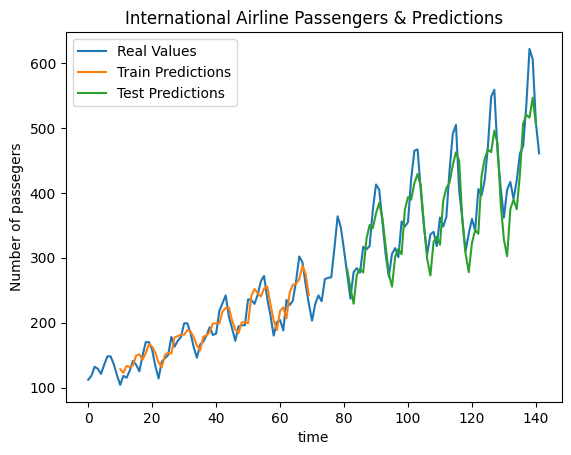

In [12]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stamp:len(trainPredict)+time_stamp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_stamp*2) + 1:len(dataset) - 1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label = 'Real Values')
plt.plot(trainPredictPlot, label = 'Train Predictions')
plt.plot(testPredictPlot, label = 'Test Predictions')
plt.xlabel("time")
plt.ylabel("Number of passegers")
plt.title("International Airline Passengers & Predictions")
plt.legend()
plt.show()